Matteo Picciolini

# Esercitazione 11 - Esercizio 11.3

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

2023-06-26 16:00:38.188789: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-26 16:00:38.223232: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-26 16:00:38.224497: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 16:00:38.848732: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Exercise 11.3
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

### Risoluzione
Per risolvere questo esercizio sono partito dal codice dei due esercizi precedenti, cambiando però il numero di parametri in ingresso a $2$ invece che $1$, poiché la funzione $f$ è una funzione in due variabili. Mostro di seguito il codice che ho utilizzato.

In [2]:
N_epochs = 50
N_train = 10000 # <<< train
N_valid = 1000 # <<< test
sigma = 0.2

def f(x, y):
    return np.sin((x ** 2 + y ** 2))

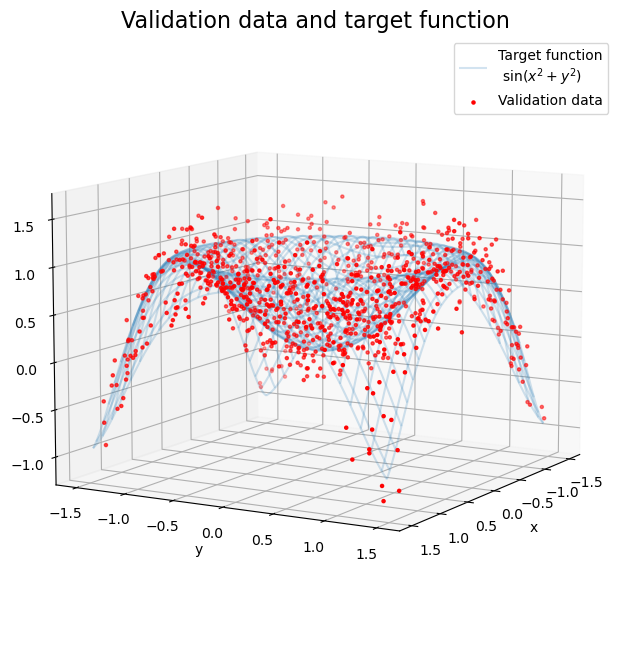

In [3]:
x_train = np.random.uniform(-3./2., 3./2., N_train)
x_valid = np.random.uniform(-3./2., 3./2., N_valid)

y_train = np.random.uniform(-3./2., 3./2., N_train)
y_valid = np.random.uniform(-3./2., 3./2., N_valid)

XY_train = np.column_stack((x_train,y_train))
XY_valid = np.column_stack((x_valid,y_valid))

z_target = f(x_valid, y_valid)
z_train = np.random.normal(f(x_train,y_train), sigma)
z_valid = np.random.normal(f(x_valid,y_valid), sigma)

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-3./2., 3./2., 0.05)
y_surf = np.arange(-3./2., 3./2., 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf), label = 'Target function\n $\sin(x^2+y^2)$', alpha = 0.2)
ax.scatter(x_valid, y_valid, z_valid, marker = ".", color = "r", label = 'Validation data')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data and target function", fontsize = 16)
ax.legend()
ax.view_init(10, 30)

plt.show()

Costruisco ora la rete neurale e procedo con l'allenamento della rete. Procedo poi con il *tuning* dei parametri.

Per questo problema ho riutilizzato la rete neurle costruita precedentemente, modificando la dimansione degli input in ingresso a due. Inoltre, utilizzo come ottimizzatore `nadam`(Nesterov Adaptive Moment Estimation), che è una variante di `adam`, poiché a partià di *layers* e di epoche mi restituisce risultati migliori. Cambio, poi, la funzione di attivazione in `tanh`.

In [4]:
model = tf.keras.Sequential()
act = 'tanh'
model.add(Dense(40, input_shape = (2,), activation = act))
model.add(Dense(20, activation = act))
model.add(Dense(1, activation = act))

model.compile(optimizer = 'nadam', loss = 'mse', metrics = ['mse'])

# ==============================================
# Get a summary of our composed model
# ==============================================
model.summary()

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(    x = XY_train, y = z_train, 
                        batch_size = 32, epochs = N_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle = True,                        
                        validation_data = (XY_valid, z_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                120       
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


2023-06-26 16:00:40.988678: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/50
313/313 [==============================] - 2s 4ms/step - loss: 0.2158 - mse: 0.2158 - val_loss: 0.1886 - val_mse: 0.1886
Epoch 2/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1879 - mse: 0.1879 - val_loss: 0.1897 - val_mse: 0.1897
Epoch 3/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1881 - mse: 0.1881 - val_loss: 0.1880 - val_mse: 0.1880
Epoch 4/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1877 - mse: 0.1877 - val_loss: 0.1890 - val_mse: 0.1890
Epoch 5/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1878 - mse: 0.1878 - val_loss: 0.1906 - val_mse: 0.1906
Epoch 6/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1875 - mse: 0.1875 - val_loss: 0.1898 - val_mse: 0.1898
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1867 - mse: 0.1867 - val_loss: 0.1873 - val_mse: 0.1873
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.

In [5]:
w = model.get_weights()

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(XY_valid, z_valid, batch_size = 32, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(XY_valid, z_target, batch_size = 32, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

TEST DATA evaluation
Test loss:      0.042300887405872345
Test accuracy:  0.042300887405872345

EXACT CURVE evaluation
Test loss:      0.0031314075458794832
Test accuracy:  0.0031314075458794832


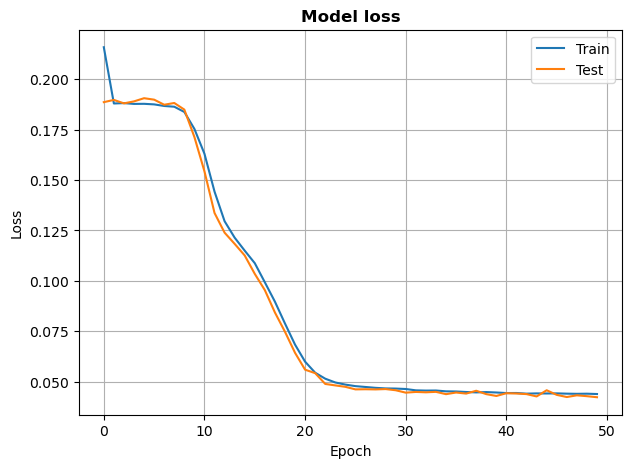

157/157 [==============================] - 0s 1ms/step


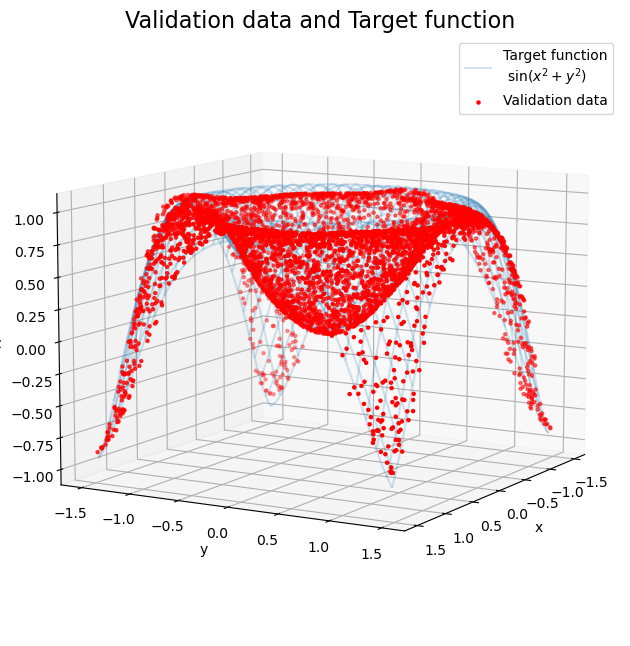

In [6]:
plt.figure(figsize = (7,5))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

x_predicted = np.random.uniform(-3./2, 3./2, 5000) 
y_predicted = np.random.uniform(-3./2, 3./2, 5000) 
XY_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(XY_predicted)

# plot
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    label = 'Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label = 'Validation data')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data and Target function", fontsize = 16)
ax.legend()
ax.view_init(10, 30)


plt.show()

#### Commenti

Per allenare questa rete ho utilizzato due *hidden layers* con funzione di attivazione tangente iperbolica. La scelta di questa funzione di attivazione permette di ottenere in *output* anche risultati negativi. La funzione $f$, infatti, nel range $\left[-3/2, 3/2\right]$ assume valori compresi tra $-1$ e $1$; pertanto, l'utilizzo di una funzione di attivazione come `relu`, non permetterebbe di riprodurre con grande precisione l'andamento della funzione $f$.

Per l'allenamento della rete ho utilizzato $50$ epoche, ma, come si può vedere dall'ultimo specchietto, nelle ultime $15$ epoche il miglioramento della *loss function* diventa molto lento. 

Per ottenere dei risultati accettabili ho dovuto, inoltre, aumentare il numero dei dati di *train* e *test* ben oltre il valore che ho utilizzato per gli altri due esercizi di questa lezione. Il motivo è da ricercarsi nella diversa dimensionalità del modello.